In [1]:
%matplotlib nbagg
#%load_ext line_profiler
#%load_ext memory_profiler

import jungfrau_utils as ju
import numpy as np
import json
import os, math
import time
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors

import h5py
from ipyfilechooser import FileChooser

from alvra_tools import *
from alvra_tools.channels import *
from alvra_tools.utils import errfunc_sigma, errfunc_fwhm, threshold
import glob

## Please add correct values of input parameters

In [2]:
roi1 = (7740, 7900, 220, 300) #signal 1
roi2 = (7740, 7900, 400, 480) #bkg 1

roi3 = (5080, 5220, 180, 280) #signal 2
roi4 = (5080, 5220, 300, 400) #bkg 2


# glob.glob('/sf/alvra/data/p18938/res/Claudio/Febpy_XES_*')
# Delay_mm = load_scan_readback('/sf/alvra/data/p18938/raw/scan_info/Febpy_XES_timescan_loop_1_2.json')


In [3]:
##### Loads .h5 files which contain the 2D maps generated in each time scan
loadfiles = []
for file in glob.glob('/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF*'):    
    loadfiles.append(file)
loadfiles = sorted(loadfiles, key = os.path.getmtime)
loadfiles

['/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_1_TT_export.h5',
 '/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_2_TT_export.h5',
 '/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_3_TT_export.h5',
 '/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_4_TT_export.h5',
 '/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_5_TT_export.h5',
 '/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_6_TT_export.h5',
 '/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_7_TT_export.h5',
 '/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_8_TT_export.h5',
 '/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_9_TT_export.h5',
 '/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_10_TT_export.h5',
 '/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_11_TT_export.h5',
 '/sf/al

In [4]:
Delay_fs = h5py.File(loadfiles[0], 'r')['Delay_rebin'][:]
# # print(Delay_mm)
Timezero = 235.7348   # position of Timezero on PP delay (in mm!)
# Delay_ps = (Delay_mm - Timezero)*2/(3e8*1e3*1e-12) # change to right t0 !
# Delay_fs = Delay_ps*1000
Delay_mm = ((3e8*1e3*1e-12)*1000-Timezero*2)/2

In [5]:
## reads data from loaded .h5 files and stores them as matrices 
###for pumped, unpumped and transient data for roi's

# Delay_mm = load_scan_readback('/sf/alvra/data/p18938/raw/scan_info/Febpy_XES_timescan_loop_1_2.json')

pumped_roi1 = 0
unpumped_roi1 = 0
transient_roi1 = 0
# pumped_roi3 = 0
# unpumped_roi3 = 0
# transient_roi3 = 0

for fn in loadfiles:
    print (fn)
    with h5py.File(fn, "r") as file2open:
        RIXS_pumped_roi1_TT = file2open['RIXS_pumped_roi1_TT'][:]
        RIXS_unpumped_roi1 = file2open['RIXS_unpumped_roi1_TT'][:]
        RIXS_transient_roi1 = file2open['RIXS_transient_roi1_TT'][:]
#         RIXS_pumped_roi3 = file2open['RIXS_pumped_roi3'][:]
#         RIXS_unpumped_roi3 = file2open['RIXS_unpumped_roi3'][:]
#         RIXS_transient_roi3 = file2open['RIXS_transient_roi3'][:]
    
    pumped_roi1 += RIXS_pumped_roi1_TT
    unpumped_roi1 += RIXS_unpumped_roi1
    transient_roi1 += RIXS_transient_roi1
#     pumped_roi3 += RIXS_pumped_roi3
#     unpumped_roi3 += RIXS_unpumped_roi3
#     transient_roi3 += RIXS_transient_roi3

/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_1_TT_export.h5
/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_2_TT_export.h5
/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_3_TT_export.h5
/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_4_TT_export.h5
/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_5_TT_export.h5
/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_6_TT_export.h5
/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_7_TT_export.h5
/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_8_TT_export.h5
/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_9_TT_export.h5
/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_10_TT_export.h5
/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_timescan_lowF_loop_11_TT_export.h5
/sf/alvra/data/p18938/scratch/victoria/TT/Febpy_XES_

In [6]:
## define pixel axis from roi's given

pixel_axis_1 = np.array(np.linspace(roi1[0],roi1[1]-1,roi1[1]-roi1[0]))
pixel_axis_3 = np.array(np.linspace(roi3[0],roi3[1]-1,roi3[1]-roi3[0]))

<IPython.core.display.Javascript object>


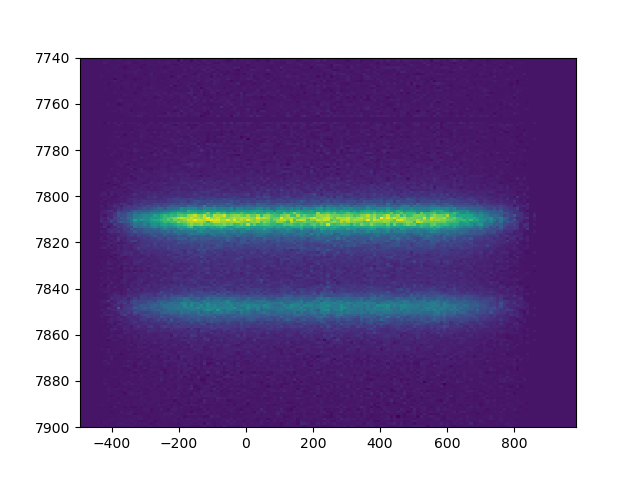

<IPython.core.display.Javascript object>


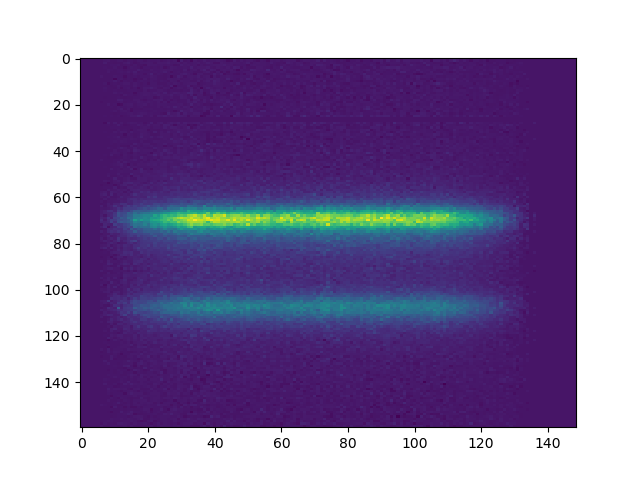

In [7]:
### plot 2D map of chosen data type using real axis

data_type = pumped_roi1
roi = roi1


plt.figure()
plt.imshow(data_type, aspect='auto', extent=[Delay_fs[0], Delay_fs[-1], roi[1], roi[0]])
plt.show()

### plot 2D map of chosen data type with x and y axis as i and j from matrices

data_type = pumped_roi1
plt.figure()
plt.imshow(data_type, aspect='auto'), #extent=[roi1[0], roi1[1], Delay_fs[-1], Delay_fs[0]])
plt.show()


In [9]:
## Camila's mess!! Spplited in different lines for clarity:
# psv = 
# A.
# *(mu.*(2./pi).*((2.*w./(1+exp(-a.*(x-xc))))./(4.*(x-xc).^2+(2.*w./(1+exp(-a.*(x-xc)))).^2)
#        +(1 - mu).*(sqrt(4.*log(2))./(sqrt(pi).*((2.*w./(1+exp(-a.*(x-xc))))))) 
#        .*exp(-(4.*log(2)./((2.*w./(1+exp(-a.*(x-xc))).^2).*(x-xc).^2)))
#       ))
#     +(x*(z)+zt) 

##inputs
# A, a, mu, w, xc, z, zt

In [10]:
def psv_function(x, A, a, mu, w, xc, z, zt):

    psv1 = (mu*(2/np.pi)*((2*w/(1+np.exp(-a*(x-xc))))/(4*(x-xc)**2+(2*w/(1+np.exp(-a*(x-xc))))**2)))
    
    psv2 = ((1-mu)*(np.sqrt(4*np.log(2))/(np.sqrt(np.pi)*((2*w/(1+np.exp(-a*(x-xc))))))))
    
    psv3 = (np.exp(-(4*np.log(2)/((2*w/(1+np.exp(-a*(x-xc)))**2)*(x-xc)**2))))
    
    psv4 = (x*z+zt)

    return (A*(psv1+(psv2*psv3)) + psv4)

# def psv_function(x, A, a, mu, w, xc):

#     psv1 = (mu*(2/np.pi)*((2*w/(1+np.exp(-a*(x-xc))))/(4*(x-xc)**2+(2*w/(1+np.exp(-a*(x-xc))))**2)))
    
#     psv2 = ((1-mu)*(np.sqrt(4*np.log(2))/(np.sqrt(np.pi)*((2*w/(1+np.exp(-a*(x-xc))))))))
    
#     psv3 = (np.exp(-(4*np.log(2)/((2*w/(1+np.exp(-a*(x-xc)))**2)*(x-xc)**2))))
    
#     psv4 = (x*(-1.75392155e+00)+1.53121900e+04)

#     return (A*(psv1+(psv2*psv3)) + psv4)

<IPython.core.display.Javascript object>


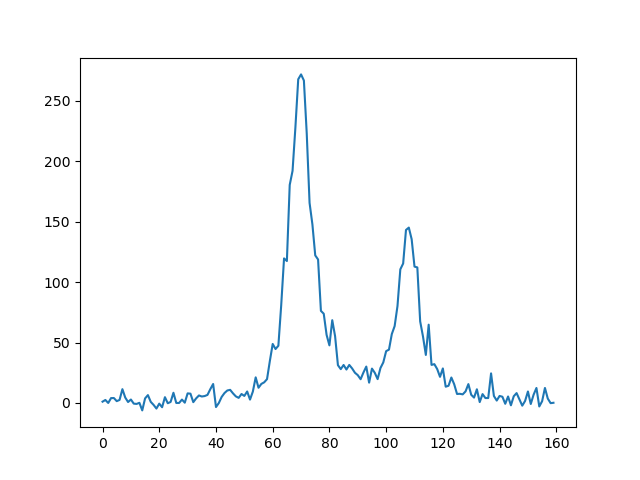

In [11]:
y_axis = pumped_roi1[:,78]
len(y_axis)
plt.figure()
plt.plot(y_axis)

[7780. 7781. 7782. 7783. 7784. 7785. 7786. 7787. 7788. 7789. 7790. 7791.
 7792. 7793. 7794. 7795. 7796. 7797. 7798. 7799. 7800. 7801. 7802. 7803.
 7804. 7805. 7806. 7807. 7808. 7809. 7810. 7811. 7812. 7813. 7814. 7815.
 7816. 7817. 7818. 7819. 7820. 7821. 7822. 7823. 7824. 7825. 7826. 7827.
 7828. 7829. 7830. 7831. 7832. 7833. 7834. 7835. 7836. 7837. 7838. 7839.]


<IPython.core.display.Javascript object>


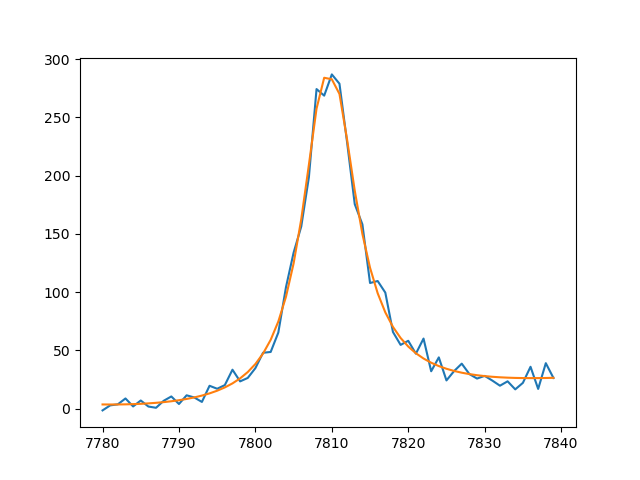

[ 4.06515314e+03  3.44158396e-02  9.50227617e-01  8.06274789e+00
  7.80978969e+03  7.80316136e-01 -6.11470753e+03]


/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [12]:
### test one curve fit / look for input parameters for voigt

b = np.transpose(pumped_roi1)
xb= pixel_axis_1[40:100]
print(xb)
yb= b[40][40:100]
plt.figure()
plt.plot(xb,yb)
p0 = [300, 0,  0.5,  10, 7810,  0, -100]
fit, extras = curve_fit(psv_function,xb,yb, p0 = p0, maxfev = 25000)
adelayb = psv_function(xb, *fit)
plt.plot(xb,adelayb)
print(fit)

## Next cell fits all the rows individually and outputs matrices with the fit parameters and fit results (calculated intensity from fit)

<IPython.core.display.Javascript object>


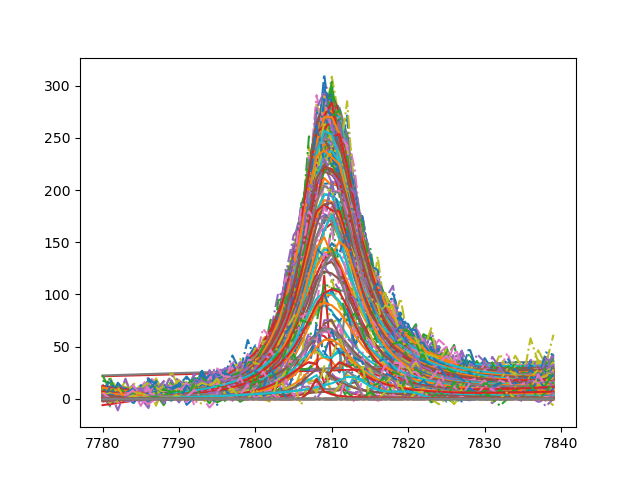

/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


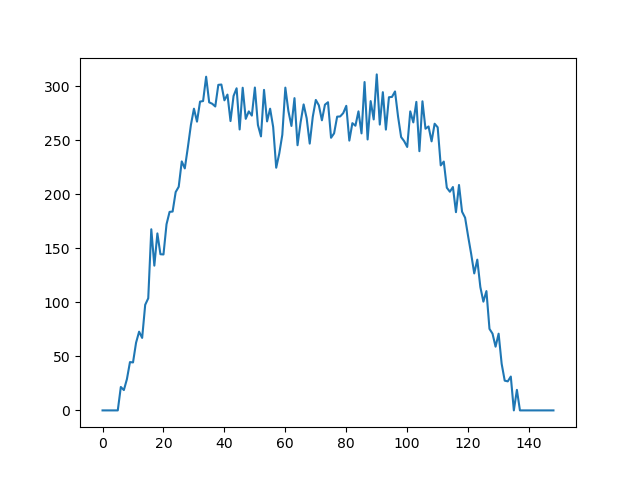

0 data rows were not properly fitted.


In [13]:
#### choose limits for x axis around peak to be fitted:

limx1 = 40
limx2 = 100
pixel_axis = pixel_axis_1
data2fit =  np.transpose(pumped_roi1)


fit_params = []
fit_results = []
index = np.arange(0, data2fit.shape[0]-1,data2fit.shape[0])

plt.figure()
maxi = []
counter = 0 
bad_entries = []
delay_fs_fitted = []
delay_mm_fitted = []

for y in data2fit:
    x= pixel_axis[limx1:limx2]
    y= y[limx1:limx2]
#     print(y.shape)
    plt.plot(x,y, '-.')
    
    max_amplitude = np.amax(y)
    maxi.append(max_amplitude)

    p0 = [max_amplitude, 0,  0.5,  10, 7810,  0, 0]  #[300, 0,  0.5,  10, 7810,  0, -100]
    try:
        fit, extras = curve_fit(psv_function,x,y, p0 = p0, maxfev = 25000)
        adelay = psv_function(x, *fit)
        plt.plot(x,adelay)
        fit_params.append(fit)
        fit_results.append(adelay)
        delay_fs_fitted.append(Delay_fs[counter])
#     delay_mm_fitted.append(Delay_mm[counter])   
    except:
        bad_entries.append(counter)
    
    counter+=1


plt.figure()
plt.plot(maxi)

fitparams_matrix = np.array(fit_params)
fitresults_matrix = np.array(fit_results)
fitresults_matrix.shape


print(str(len(bad_entries))+' data rows were not properly fitted.')

In [15]:
len(bad_entries)

0

<IPython.core.display.Javascript object>


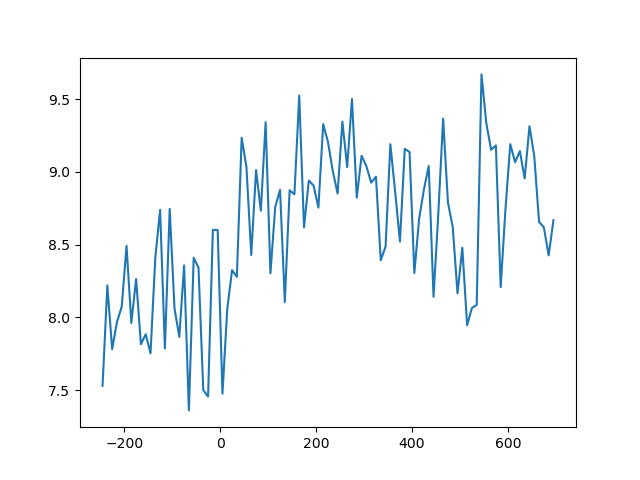

In [72]:
plt.figure()
plt.plot(delay_fs_fitted[25:120],fitparams_matrix[:,0][25:120])

# p0 = [A, a, mu, w, xc, z, zt]
# p0 = [0, 1,  2, 3,  4, 5, 6]

# fit_fwhm, extras = curve_fit(errfunc_fwhm, Delay_fs,fitparams_matrix[:,3], p0 = [8.4, -0.5, 40, 80])
# print(fit_fwhm)
# fwm = errfunc_fwhm(Delay_fs,*fit_fwhm)
# fwm_ideal = errfunc_fwhm(Delay_fs, 8.8, -0.5, 50, 90)
# # print(fwm)

# plt.plot(Delay_fs,fwm)
# # plt.plot(Delay_fs,fwm_ideal)
                             


<IPython.core.display.Javascript object>


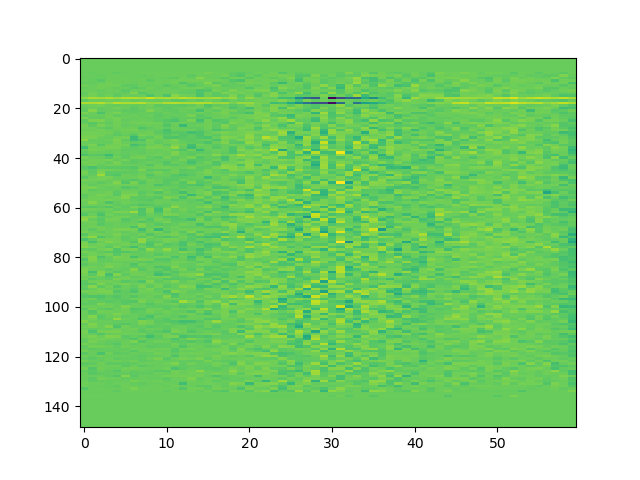

In [17]:
## plot residuals from fit
plt.figure()
plt.imshow(fitresults_matrix-data2fit[:,limx1:limx2], aspect = 'auto')

## Next cells for fitting void to rebinned

In [66]:
bin_size = 5


limx1 = 0
limx2 = 100
pixel_axis = pixel_axis_1
data2fit =  np.transpose(pumped_roi1)



data2fit_rebin = [0]
delay_rebin = []
loop = np.linspace(0, bin_size-1, bin_size)
rebin_slot = 0

itt = 0
counter = 0 
for row in data2fit:
    if counter < bin_size-1:
        rebin_slot += row
        data2fit_rebin[itt] = rebin_slot
        counter +=1
    else:
        rebin_slot = 0
        rebin_slot += row
        data2fit_rebin.append(rebin_slot)
        delay_rebin.append(Delay_fs[itt*counter])
        counter = 0
        itt += 1
        
data2fit_rebin = np.array(data2fit_rebin)

In [67]:
type(data2fit_rebin)

numpy.ndarray

<IPython.core.display.Javascript object>


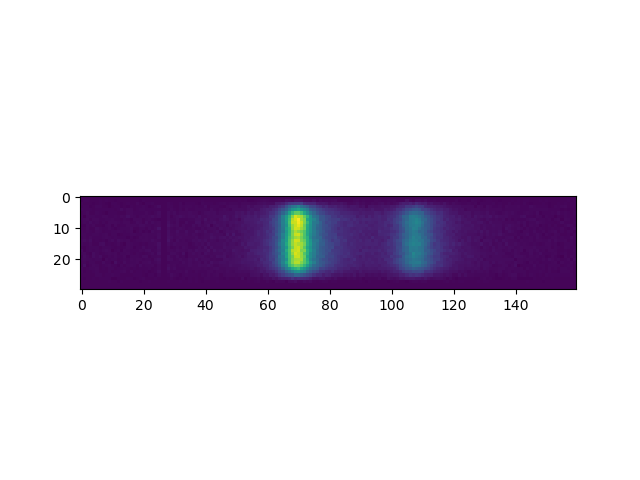

In [68]:
np.shape(data2fit_rebin)
itt
plt.figure()
plt.imshow(data2fit_rebin)

<IPython.core.display.Javascript object>


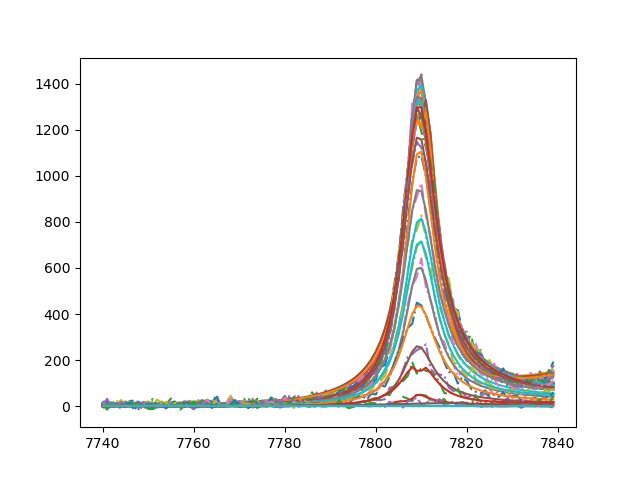

/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


0 data rows were not properly fitted.


/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/sf/alvra/anaconda/alvra-analysis/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


In [69]:
#### choose limits for x axis around peak to be fitted:

fit_params_rebin = []
fit_results_rebin = []
index_rebin = np.arange(0, data2fit.shape[0]-1,data2fit.shape[0])
maxi_rebin = []
counter_rebin = 0 
bad_entries_rebin = []
delay_fs_fitted_rebin = []
delay_mm_fitted_rebin = []
# print(data2fit_rebin)

plt.figure()

for y in data2fit_rebin:    
#     print(np.array(y))
    x= pixel_axis[limx1:limx2]
    y= y[limx1:limx2]

    plt.plot(x,y, '-.')

    max_amplitude = np.amax(y)
    maxi_rebin.append(max_amplitude)

    p0 = [max_amplitude, 0,  1,  10, 7810,  0, 50]  #[300, 0,  0.5,  10, 7810,  0, -100]

    try:
        fit, extras = curve_fit(psv_function,x,y, p0 = p0, maxfev = 25000)
        adelay = psv_function(x, *fit)
        plt.plot(x,adelay)
        fit_params_rebin.append(fit)
        fit_results_rebin.append(adelay)
        delay_fs_fitted_rebin.append(delay_rebin[counter])
    #     delay_mm_fitted.append(Delay_mm[counter])   
    except:
        bad_entries_rebin.append(counter)

    counter_rebin+=1


# plt.figure()
# plt.plot(maxi_rebin)

fitparams_matrix_rebin = np.array(fit_params_rebin)
fitresults_matrix_rebin = np.array(fit_results_rebin)
delay_rebin = np.array(delay_rebin)
fitresults_matrix_rebin.shape


print(str(len(bad_entries_rebin))+' data rows were not properly fitted.')

<IPython.core.display.Javascript object>


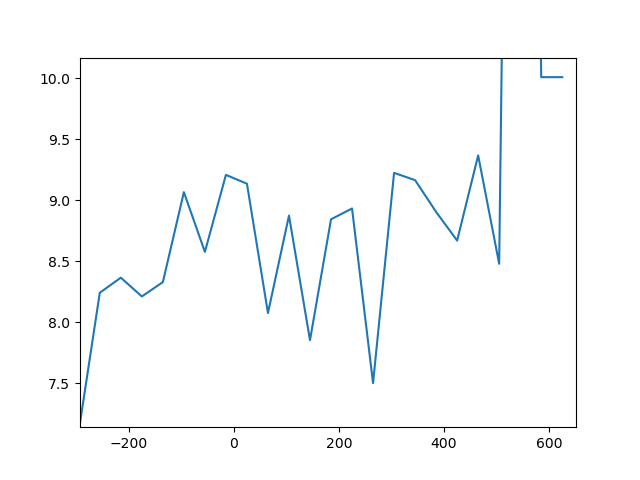

In [73]:
plt.figure()
plt.plot(np.array(delay_rebin),fitparams_matrix_rebin[1:,3])

## Next cell is for creating matrices of matrices, processing each file individually, and not summing them

In [ ]:


pumped_roi1_units = []
unpumped_roi1 = 0
transient_roi1 = 0
pumped_roi3 = 0
unpumped_roi3 = 0
transient_roi3 = 0

for fn in loadfiles[:-1]:
    print (fn)
    with h5py.File(fn, "r") as file2open:
        RIXS_pumped_roi1 = file2open['RIXS_pumped_roi1'][:]
        RIXS_unpumped_roi1 = file2open['RIXS_unpumped_roi1'][:]
        RIXS_transient_roi1 = file2open['RIXS_transient_roi1'][:]
        RIXS_pumped_roi3 = file2open['RIXS_pumped_roi3'][:]
        RIXS_unpumped_roi3 = file2open['RIXS_unpumped_roi3'][:]
        RIXS_transient_roi3 = file2open['RIXS_transient_roi3'][:]
    
    pumped_roi1_units.append(RIXS_pumped_roi1)
#     unpumped_roi1 += RIXS_unpumped_roi1
#     transient_roi1 += RIXS_transient_roi1
#     pumped_roi3 += RIXS_pumped_roi3
#     unpumped_roi3 += RIXS_unpumped_roi3
#     transient_roi3 += RIXS_transient_roi3



fitparams_matrices_units = []
fitresults_matrices_units = []


for unit in pumped_roi1_units:
        #### choose limits for x axis around peak to be fitted:

        limx1 = 30
        limx2 = 95
        pixel_axis = pixel_axis_1
        data2fit = unit


        fit_params = []
        fit_results = []
        index = np.arange(0, data2fit.shape[0]-1,data2fit.shape[0])

    #     plt.figure()

        for y in data2fit:
            x= pixel_axis[limx1:limx2]
            y= y[limx1:limx2]
        #     print(y.shape)
    #         plt.plot(y, '-.')
            fit = p0 = [2e+05,  8e-02,  1,  8,7809.5,  3.47e-01, -2.4e+03]
            fit, extras = curve_fit(psv_function,x,y, p0 = p0, maxfev = 25000)
            fit_params.append(fit)
            adelay = psv_function(x, *fit)
        #     a.append(adelay)
    #         plt.plot(adelay)
        #     fit_result = psv_function(pixel_axis[limx1:limx2],*fit)
            fit_results.append(adelay)

        fitparams_matrix = np.array(fit_params)
        fitresults_matrix = np.array(fit_results)
        fitparams_matrices_units.append(fitparams_matrix)
        fitresults_matrices_units.append(fitresults_matrix)




In [ ]:
plt.figure()
plt.imshow(fitresults_matrices_units[7], aspect = 'auto')

In [ ]:
#### give the number of the voigt function parameter you want to look at:
#     p0 = [A, a, mu, w, xc, z, zt]
#     p0 = [0, 1,  2, 3,4, 5, 6]

j = 3
plt.figure()
counter = 0
width = []

for file in loadfiles[:-1]:
    plt.plot(Delay_fs,fitparams_matrices_units[counter][:,j], '.')
    fit_fwhm, extras = curve_fit(errfunc_fwhm, Delay_fs,fitparams_matrices_units[counter][:,j], p0 = [8.4, -0.5, 40, 80])
    width.append(fit_fwhm[-1])
    fwm = errfunc_fwhm(Delay_fs,*fit_fwhm)
    plt.plot(Delay_fs,fwm)
    print(fit_fwhm[-1])
    counter+=1
    
plt.figure()
plt.plot(width)